In [5]:
import torch

In [2]:
x = torch.tensor(5.0, requires_grad=True)
y = 3 * x ** 2

y.backward()
x.grad

tensor(30.)

In [3]:
def rosenbrock(x0: torch.Tensor, x1: torch.Tensor) -> torch.Tensor:
    return 100 * (x1 - x0 ** 2) ** 2 + (1 - x0) ** 2

In [4]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


### RosenBrock Gradient Descent

<Figure size 640x480 with 0 Axes>

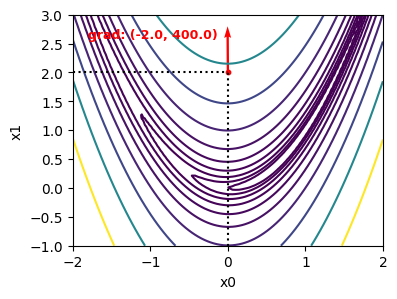

In [5]:
import matplotlib.pyplot as plt
import numpy as np

grads = np.array([x0.grad.cpu().numpy(), x1.grad.cpu().numpy()])

# > plot contour
x0s = np.linspace(-2, 2, 100)
x1s = np.linspace(-1, 3, 100)
x0s, x1s = np.meshgrid(x0s, x1s)
ys = rosenbrock(x0s, x1s)

plt.clf()
plt.figure(figsize=(4, 3))
plt.contour(x0s, x1s, ys, levels=np.logspace(0, 3, 10))

# > plot gradient
plt.quiver(0, 2, grads[0]*.002, grads[1]*.002, angles='xy', scale_units='xy', scale=1, color='red')
plt.scatter(0, 2, color='red', s=10)  
plt.plot([0, 0], [-1, 2], color='black', linestyle=':')
plt.plot([-2, 0], [2, 2], color='black', linestyle=':')
plt.text(-1.8, 2.6, f"grad: ({grads[0]}, {grads[1]})", fontsize=9, color='red', fontweight='bold')
plt.xlabel('x0')
plt.ylabel('x1')
plt.savefig("./result_images/plot_grad.png")
plt.show()

In [6]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

iters = 10000
lr = 0.001
paths = []
for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())
    
    y = rosenbrock(x0, x1)
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad
    paths.append(np.array([x0.item(), x1.item()]))
    x0.grad.zero_()
    x1.grad.zero_()
paths = np.array(paths)
print(x0.item(), x1.item())

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598


<Figure size 640x480 with 0 Axes>

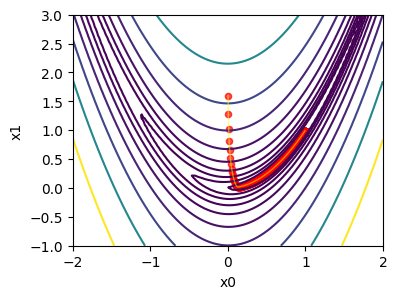

In [7]:
# > plot contour
x0s = np.linspace(-2, 2, 100)
x1s = np.linspace(-1, 3, 100)
x0s, x1s = np.meshgrid(x0s, x1s)
ys = rosenbrock(x0s, x1s)

plt.clf()
plt.figure(figsize=(4, 3))
plt.contour(x0s, x1s, ys, levels=np.logspace(0, 3, 10))

# > plot gradient
plt.plot(paths[:, 0], paths[:, 1], color='yellow', linewidth=1, alpha=0.5)
plt.scatter(paths[:, 0], paths[:, 1], color='red', linewidth=1, s=20, alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.savefig("./result_images/plot_grad_descent.png")
plt.show()

### Linear Regression

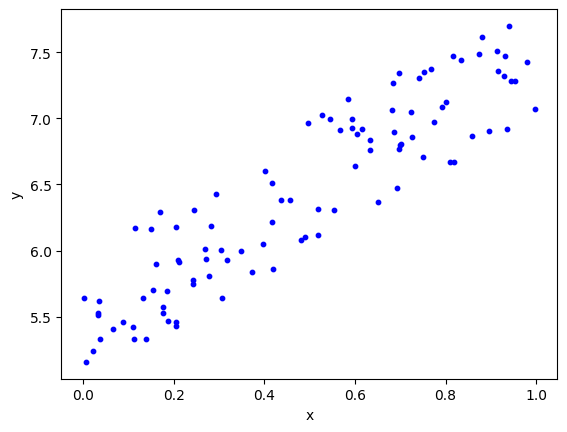

In [8]:
import torch
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

plt.clf()
plt.scatter(x, y, s=10, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("./result_images/plot_scatter.png")

In [9]:
import torch

torch.manual_seed(0)
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
    return torch.mm(x, W) + b

In [10]:
import torch.nn.functional as F
lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    loss = F.mse_loss(y_hat, y)

    loss.backward()
    W.data -= lr * W.grad
    b.data -= lr * b.grad

    W.grad.zero_()
    b.grad.zero_()
    if i % 10 == 0:
        print(loss.item())

print(loss.item())
print("===")
print(W)
print(b)

41.89796447753906
0.22483211755752563
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068
===
tensor([[2.2864]], requires_grad=True)
tensor([5.3145], requires_grad=True)


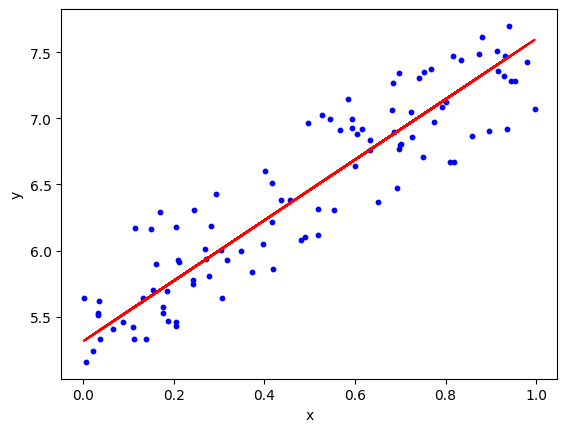

In [11]:
plt.clf()
plt.scatter(x, y, s=10, color='blue')
plt.plot(x, predict(x).detach().numpy(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("./result_images/plot_linear_regression.png")
plt.show()

## Parameters And Optimizers

In [12]:
import torch
import torch.nn as nn

W = nn.Parameter(torch.zeros((1, 1)))
b = nn.Parameter(torch.zeros(1))

print(W)
print(b)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [13]:
from typing import override

class Model(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    @classmethod
    def load_model(cls):
        return cls()

    @override
    def forward(self, x):
        y = self.linear(x)
        return y

model = Model.load_model()

for param in model.parameters():
    print(param)


Parameter containing:
tensor([[0.0421]], requires_grad=True)
Parameter containing:
tensor([0.6446], requires_grad=True)


## Toy Dataset Estimator

In [14]:
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

lr = .1
iters = 100

model = Model.load_model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 10 == 0:
        print(loss.item())

34.357582092285156
0.20249217748641968
0.08877642452716827
0.08833278715610504
0.08827987313270569
0.0882391631603241
0.08820711076259613
0.08818184584379196
0.08816195279359818
0.08814625442028046


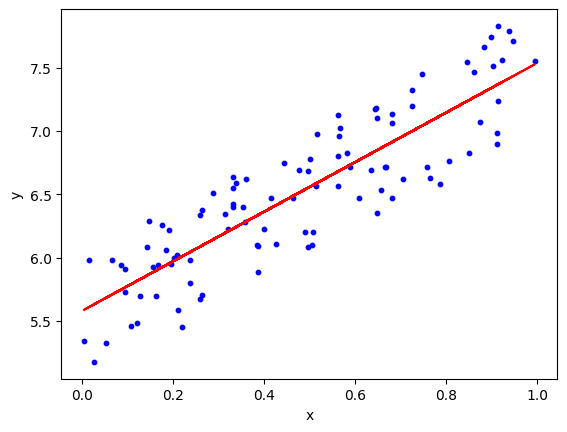

In [15]:
# > visualization

plt.clf()
plt.scatter(x, y, s=10, color='blue')
plt.plot(x, model(x).detach().numpy(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("./result_images/toy_dataset_linear_regression.png")
plt.show()


## Non Linear Estimators

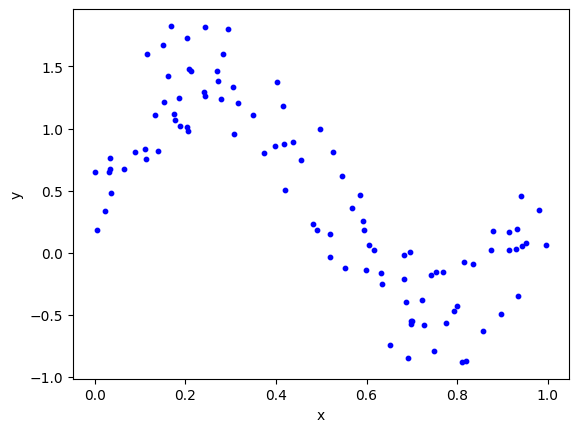

In [16]:
import torch

torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

plt.clf()
plt.scatter(x, y, s=10, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("./result_images/plot_sin_scatter.png")
plt.show()


In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
    
    @classmethod
    def load_model(cls, input_size=1, hidden_size=10, output_size=1):
        return cls(input_size, hidden_size, output_size)

    @override
    def forward(self, x):
        y= self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

In [18]:
lr = .2
iters= 10000

model = Model.load_model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 1000 == 0:
        print(loss.item())
print(loss.item())  

0.7643452286720276
0.23656320571899414
0.2322607785463333
0.22441409528255463
0.21026141941547394
0.1795787364244461
0.11798442900180817
0.08471601456403732
0.08014969527721405
0.07964840531349182
0.07943300157785416


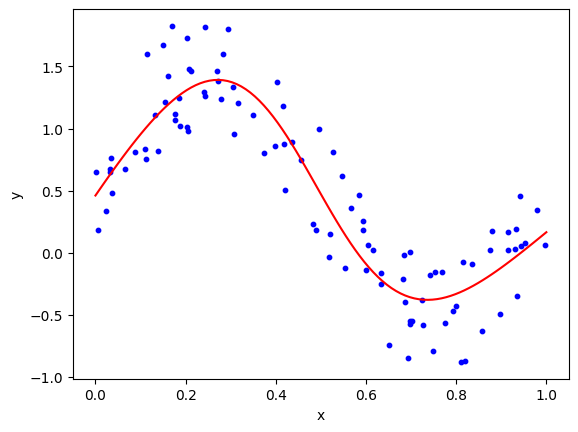

In [19]:
plt.clf()
plt.scatter(x, y, s=10, color='blue')
x = torch.linspace(0, 1, 100).view(-1, 1)
y = model(x).detach().numpy().tolist()
x = x.numpy().tolist()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("./result_images/plot_sin_regression.png")
plt.show()


### MNIST

size: 60000
type: <class 'PIL.Image.Image'>
label: 5


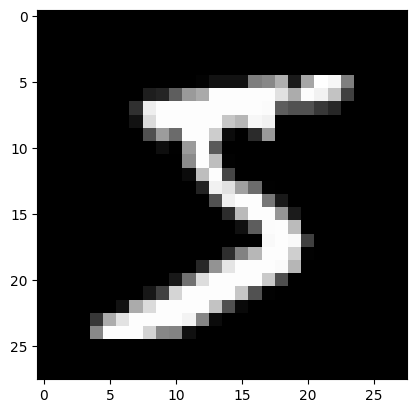

In [21]:
import matplotlib.pyplot as plt
import torchvision
dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)

x, label = dataset[0]

print("size:", len(dataset))
print("type:", type(x))
print("label:", label)

plt.clf()
plt.imshow(x, cmap='gray')
plt.show()

In [22]:
import torchvision.transforms as transforms

transform = transforms.ToTensor()

dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

x, label = dataset[0]
print("type:", type(x))
print("size:", x.shape)

type: <class 'torch.Tensor'>
size: torch.Size([1, 28, 28])


In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

for x, label in dataloader:
    print("size:", x.shape, label.shape)
    break

# 발가락으로도 하겠다

size: torch.Size([32, 1, 28, 28]) torch.Size([32])
